C:\Users\nexus\AppData\Local\Temp\ipykernel_25264\1581740785.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../city_temperature.csv", sep=",")


   Region  Country State     City  Month  Day  Year  AvgTemperature  Latitude
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2   36.7538
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4   36.7538
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8   36.7538
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4   36.7538
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9   36.7538
      City  Latitude  AvgTemperature
0  Algiers   36.7538       63.755439
1   London   51.5074       52.365228
2    Paris   48.8566       52.940686
3   Sydney  -33.8688       57.549255
4    Tokyo   35.6895       61.063501


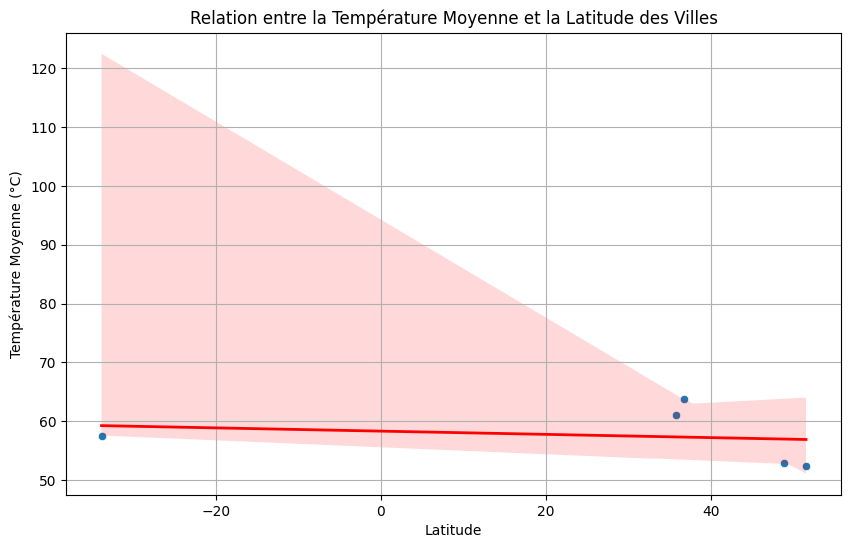

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv("../city_temperature.csv", sep=",")

# Nettoyer les noms de colonnes pour éviter les erreurs dues aux espaces
df.columns = df.columns.str.strip()

# Dictionnaire des latitudes pour certaines villes
latitudes = {
    "Tokyo": 35.6895,
    "Paris": 48.8566,
    "New York": 40.7128,
    "London": 51.5074,
    "Sydney": -33.8688,
    "Algiers": 36.7538
}

# Ajouter la latitude au DataFrame en fonction du dictionnaire
df["Latitude"] = df["City"].map(latitudes)

# Ne garder que les villes ayant des latitudes définies
df_latitude = df[df["Latitude"].notnull()]

# Vérification du DataFrame après filtrage
print(df_latitude.head())

# Calculer la température moyenne par ville et ajouter la latitude
df_avg_temp = df_latitude.groupby(["City", "Latitude"])["AvgTemperature"].mean().reset_index()

# Vérification du DataFrame après regroupement
print(df_avg_temp.head())

# Tracer le scatter plot de la température moyenne en fonction de la latitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Latitude", y="AvgTemperature", data=df_avg_temp)

# Ajouter une courbe de régression
sns.regplot(x="Latitude", y="AvgTemperature", data=df_avg_temp, scatter=False, color="red", line_kws={"linewidth": 2})

# Personnalisation du graphique
plt.title("Relation entre la Température Moyenne et la Latitude des Villes")
plt.xlabel("Latitude")
plt.ylabel("Température Moyenne (°C)")
plt.grid(True)

# Affichage
plt.show()
